# Introduction to Machine Learning: Supervised Learning - Final Project

# Introduction to the Project and Jupyter Notebooks


In a rapidly evolving global educational landscape, the significance of comprehending world-class universities cannot be overstated. World University Rankings offer vital glimpses into academia, enabling trend analysis, performance evaluation, and informed decision-making. Leveraging machine learning on this data promises an exciting journey to uncover hidden patterns and valuable predictions, providing actionable insights with far-reaching implications for the world of education and beyond.

> **Data Set**: see [World University Rankings 2023](https://www.topuniversities.com/university-rankings/world-university-rankings/2023).



In [1]:
# data import & cleaning

In [2]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('./World_University_Rankings_2023.csv')

df


,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,OverAll Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48:52:00,92.3,99.7,99.0,74.9,96.2,96.4
1,2,Harvard University,United States,"21,887",9.6,25%,50:50:00,94.8,99.0,99.3,49.5,80.5,95.2
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47:53:00,90.9,99.5,97.0,54.2,95.8,94.8
3,3,Stanford University,United States,"16,164",7.1,24%,46:54:00,94.2,96.7,99.8,65.0,79.8,94.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,90.7,93.6,99.8,90.9,89.3,94.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,24.1,15.5,61.5,37.9,76.8,34.0–39.2
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,35.1,29.4,34.5,44.2,88.7,34.0–39.2
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,18.2,14.3,68.8,37.3,72.0,34.0–39.2
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,26.4,26.7,52.8,52.1,47.6,34.0–39.2


In [3]:
df = df.fillna(0) 
df

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,OverAll Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48:52:00,92.3,99.7,99.0,74.9,96.2,96.4
1,2,Harvard University,United States,"21,887",9.6,25%,50:50:00,94.8,99.0,99.3,49.5,80.5,95.2
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47:53:00,90.9,99.5,97.0,54.2,95.8,94.8
3,3,Stanford University,United States,"16,164",7.1,24%,46:54:00,94.2,96.7,99.8,65.0,79.8,94.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,90.7,93.6,99.8,90.9,89.3,94.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,-,University of the West of Scotland,0,0,0.0,0,0,24.1,15.5,61.5,37.9,76.8,34.0–39.2
2337,-,University of Windsor,0,0,0.0,0,0,35.1,29.4,34.5,44.2,88.7,34.0–39.2
2338,-,University of Wolverhampton,0,0,0.0,0,0,18.2,14.3,68.8,37.3,72.0,34.0–39.2
2339,-,University of Wuppertal,0,0,0.0,0,0,26.4,26.7,52.8,52.1,47.6,34.0–39.2


In [4]:
df.columns

Index(['University Rank', 'Name of University', 'Location', 'No of student',
       'No of student per staff', 'International Student', 'Female:Male Ratio',
       'Teaching Score', 'Research Score', 'Citations Score',
       'Industry Income Score', 'International Outlook Score',
       'OverAll Score'],
      dtype='object')

In [5]:
df = df.drop(columns=['University Rank', 'Name of University', 'Location', 'Female:Male Ratio'])
df

df.columns = df.columns.str.replace('No of student per staff', 'No_of_student_per_staff')
df.columns = df.columns.str.replace('No of student', 'No_of_student')
df.columns = df.columns.str.replace('International Student', 'International_Student')
df.columns = df.columns.str.replace('Teaching Score', 'Teaching_Score')
df.columns = df.columns.str.replace('Research Score', 'Research_Score')
df.columns = df.columns.str.replace('Citations Score', 'Citations_Score')
df.columns = df.columns.str.replace('Industry Income Score', 'Industry_Income_Score')
df.columns = df.columns.str.replace('International Outlook Score', 'International_Outlook_Score')
df.columns = df.columns.str.replace('OverAll Score', 'OverAll_Score')



In [6]:
df.info()
df = df.drop(df.index[199:])

df['No_of_student'] = df['No_of_student'].str.replace(',','')
df['No_of_student'] = df['No_of_student'].apply(lambda x: pd.to_numeric(x))


df['International_Student'] = df['International_Student'].str.replace('%','')
df['International_Student'] = df['International_Student'].apply(lambda x: pd.to_numeric(x) / 100)


df['OverAll_Score'] = df['OverAll_Score'].apply(lambda x: pd.to_numeric(x))


df.info()
df
# df.infer_objects()
# df = df.astype(np.float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   No_of_student                2341 non-null   object 
 1   No_of_student_per_staff      2341 non-null   float64
 2   International_Student        2341 non-null   object 
 3   Teaching_Score               2341 non-null   float64
 4   Research_Score               2341 non-null   float64
 5   Citations_Score              2341 non-null   float64
 6   Industry_Income_Score        2341 non-null   float64
 7   International_Outlook_Score  2341 non-null   float64
 8   OverAll_Score                2341 non-null   object 
dtypes: float64(6), object(3)
memory usage: 137.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       ------

,No_of_student,No_of_student_per_staff,International_Student,Teaching_Score,Research_Score,Citations_Score,Industry_Income_Score,International_Outlook_Score,OverAll_Score
0,20965,10.6,0.42,92.3,99.7,99.0,74.9,96.2,96.4
1,21887,9.6,0.25,94.8,99.0,99.3,49.5,80.5,95.2
2,20185,11.3,0.39,90.9,99.5,97.0,54.2,95.8,94.8
3,16164,7.1,0.24,94.2,96.7,99.8,65.0,79.8,94.8
4,11415,8.2,0.33,90.7,93.6,99.8,90.9,89.3,94.2
...,...,...,...,...,...,...,...,...,...
194,30303,43.4,0.13,44.6,47.5,68.8,90.7,53.5,54.5
195,49543,15.8,0.06,57.1,58.6,48.6,93.4,38.7,54.5
196,18425,14.1,0.35,40.0,44.6,70.0,39.4,94.3,54.4
197,19060,15.8,0.39,31.1,37.9,84.4,41.6,97.4,54.4


In [7]:
df.info()
df.corr()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   No_of_student                199 non-null    int64  
 1   No_of_student_per_staff      199 non-null    float64
 2   International_Student        199 non-null    float64
 3   Teaching_Score               199 non-null    float64
 4   Research_Score               199 non-null    float64
 5   Citations_Score              199 non-null    float64
 6   Industry_Income_Score        199 non-null    float64
 7   International_Outlook_Score  199 non-null    float64
 8   OverAll_Score                199 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.1 KB


,No_of_student,No_of_student_per_staff,International_Student,Teaching_Score,Research_Score,Citations_Score,Industry_Income_Score,International_Outlook_Score,OverAll_Score
No_of_student,1.000000,0.202130,-0.195531,0.069316,0.110112,-0.154641,-0.083714,-0.201296,0.007484
No_of_student_per_staff,0.202130,1.000000,-0.066233,-0.270252,-0.127915,-0.245893,0.192598,0.078373,-0.235428
International_Student,-0.195531,-0.066233,1.000000,0.112930,0.205534,0.319243,-0.177134,0.777790,0.334458
Teaching_Score,0.069316,-0.270252,0.112930,1.000000,0.903444,0.090749,0.247019,-0.106915,0.896257
Research_Score,0.110112,-0.127915,0.205534,0.903444,1.000000,0.103917,0.305214,0.074759,0.929950
Citations_Score,-0.154641,-0.245893,0.319243,0.090749,0.103917,1.000000,-0.312276,0.338593,0.419528
Industry_Income_Score,-0.083714,0.192598,-0.177134,0.247019,0.305214,-0.312276,1.000000,-0.150029,0.186617
International_Outlook_Score,-0.201296,0.078373,0.777790,-0.106915,0.074759,0.338593,-0.150029,1.000000,0.210463
OverAll_Score,0.007484,-0.235428,0.334458,0.896257,0.929950,0.419528,0.186617,0.210463,1.000000


In [8]:
import piplite
await piplite.install('seaborn')
# import seaborn module 

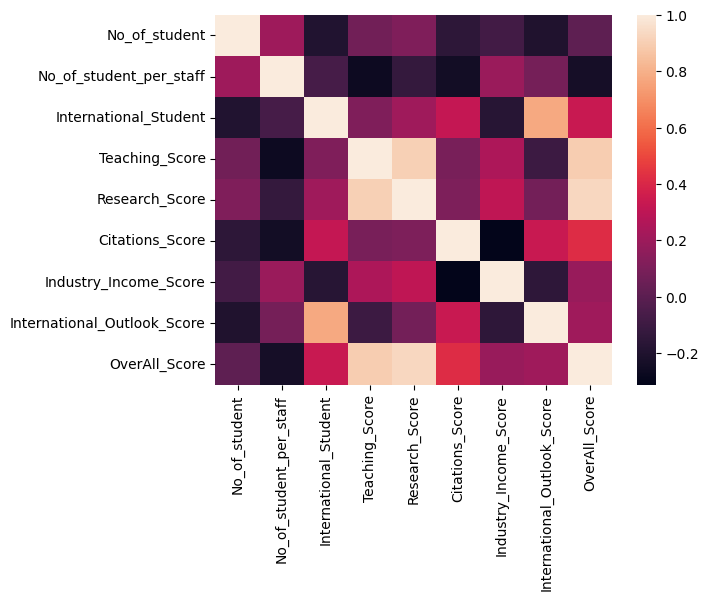

In [9]:
import seaborn as sns
# sns.set()
sns.heatmap(df.corr());

In [10]:
# by looking at the heat map, 
best_guess_predictor = 'Research_Score'

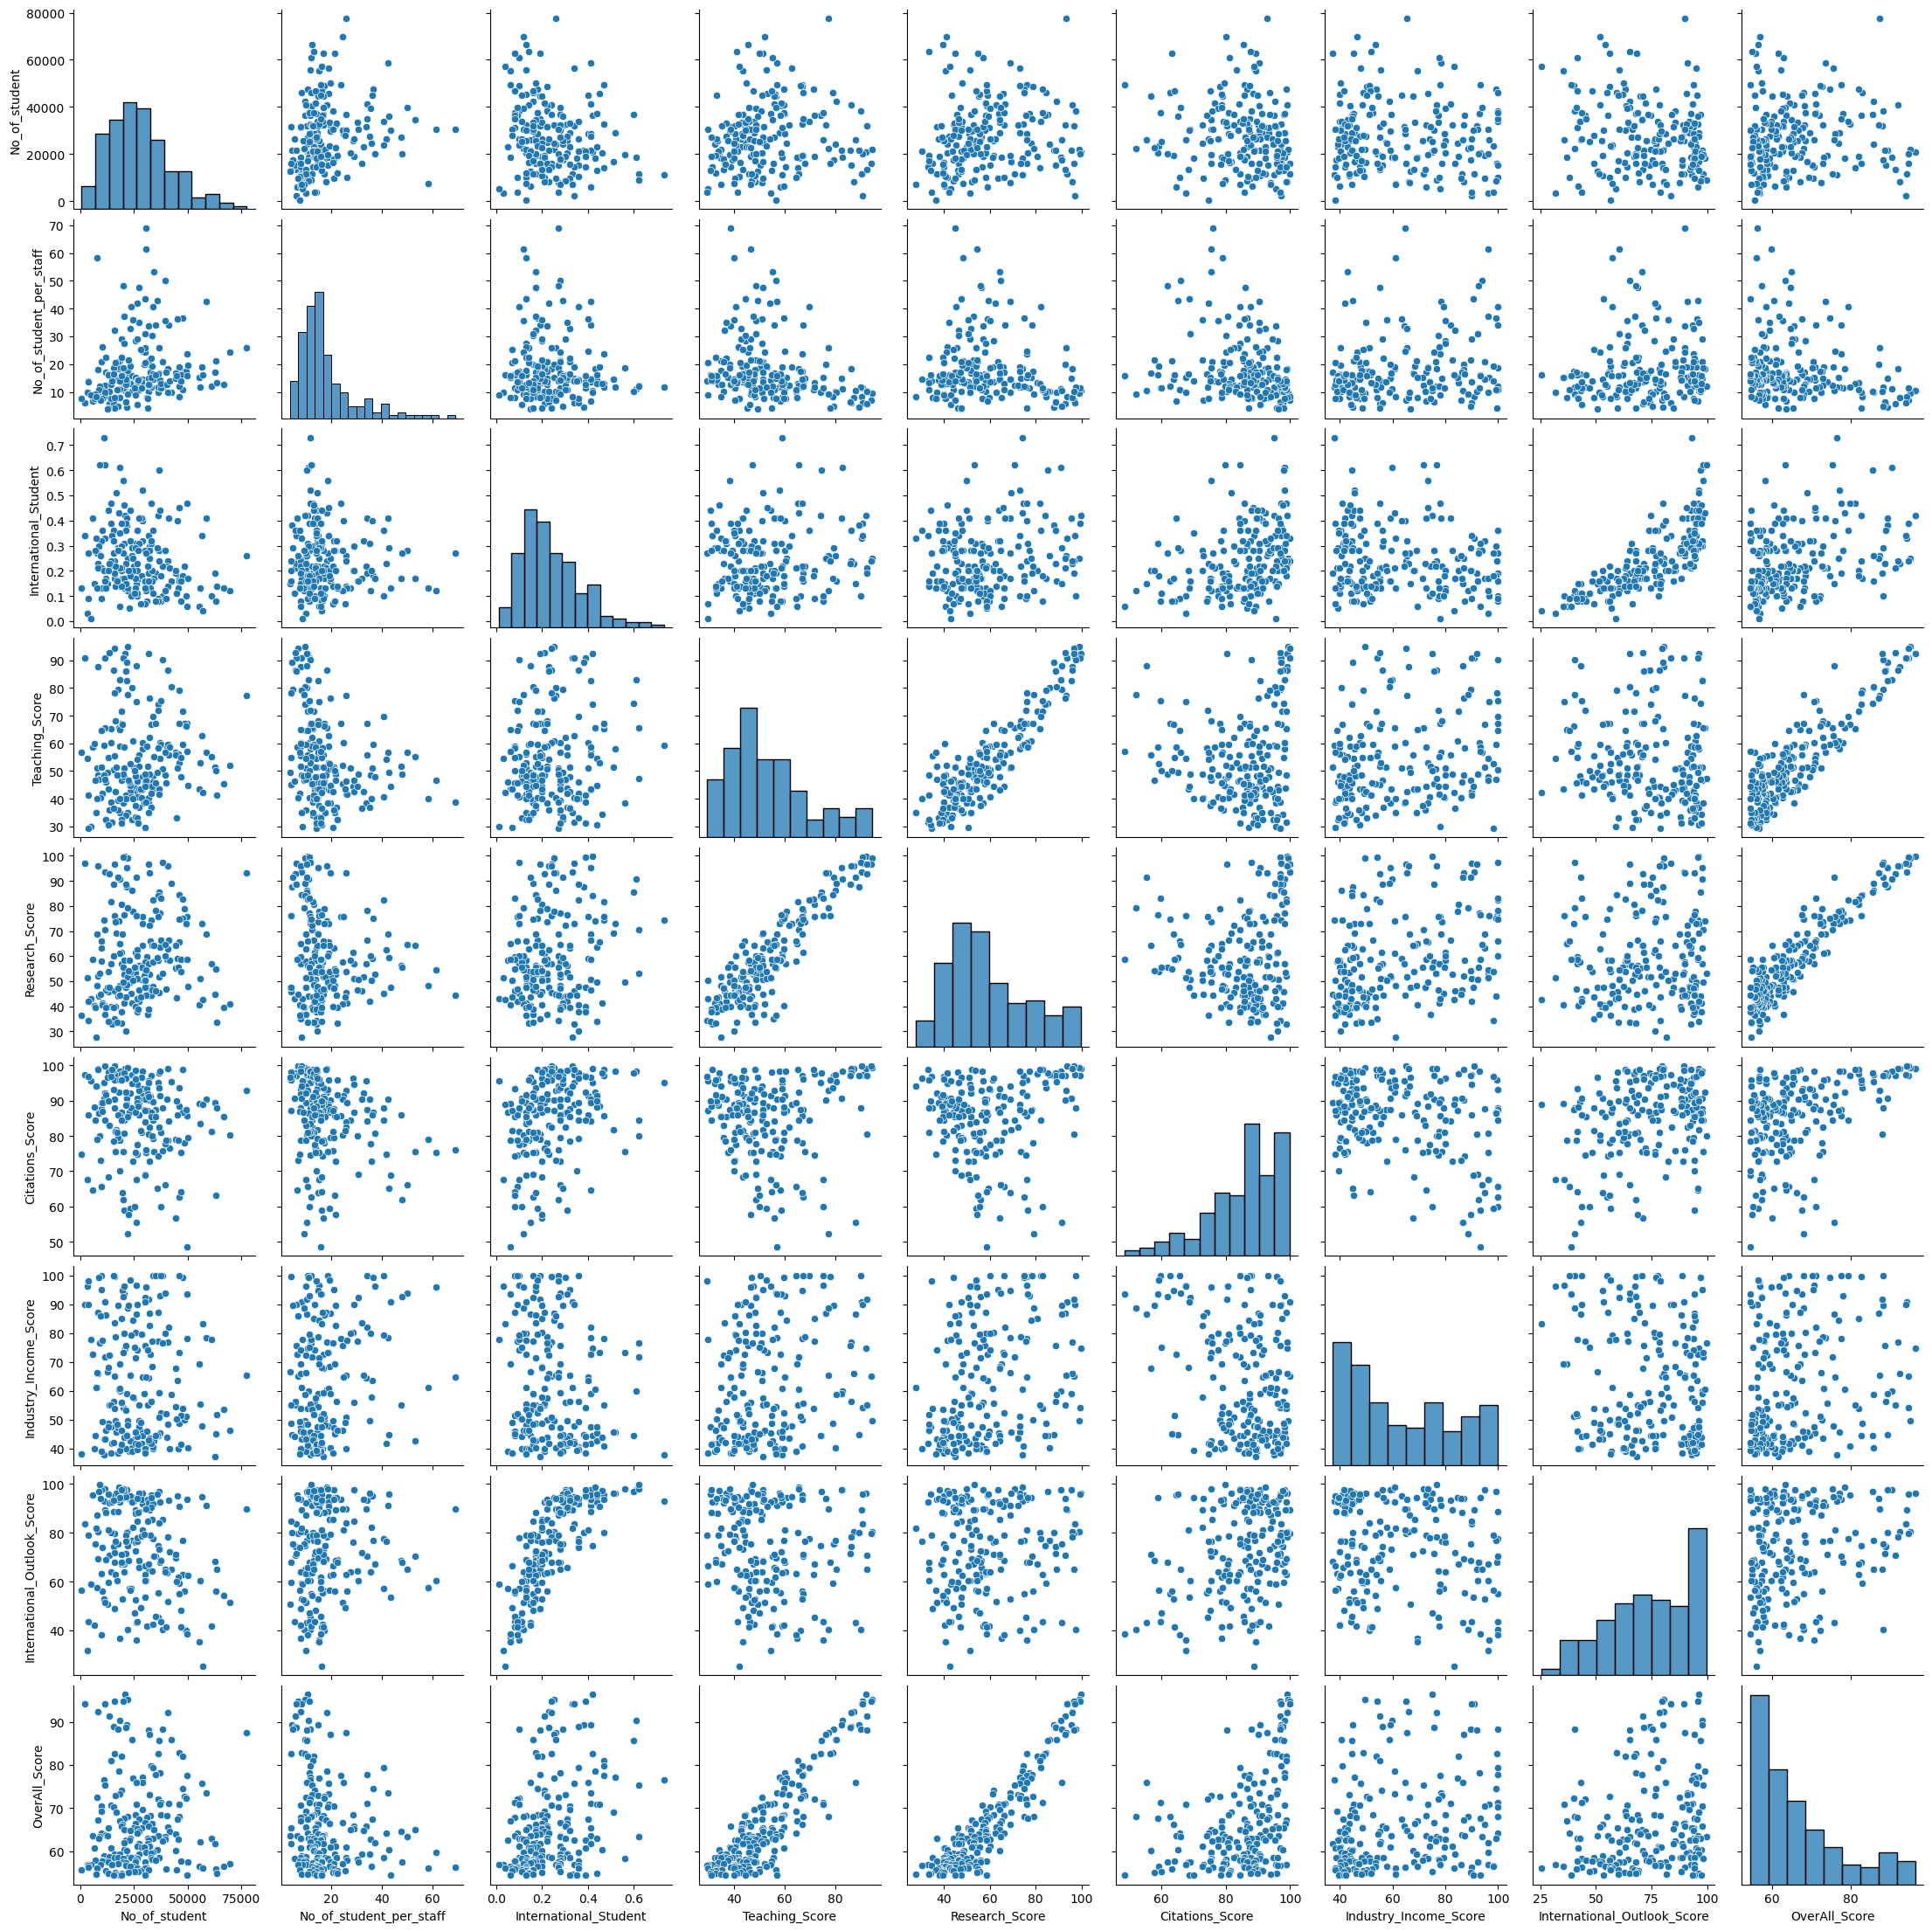

In [11]:
sns.pairplot(df.head(199))

# Linear Regression Model

In [12]:
from sklearn.model_selection import train_test_split

# your code here
X_train, X_test, Y_train, Y_test = train_test_split(df, df,test_size=0.2,train_size=0.8, random_state=42)


modelFormula ='OverAll_Score ~ '+ best_guess_predictor
print(modelFormula)   
# Make sure to use the `statsmodels.formula.api.ols` function for building the model. 
model = smf.ols(formula=modelFormula, data=X_train).fit()

print(model.summary())

OverAll_Score ~ Research_Score
                            OLS Regression Results                            
Dep. Variable:          OverAll_Score   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1159.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           2.18e-74
Time:                        18:01:32   Log-Likelihood:                -442.13
No. Observations:                 159   AIC:                             888.3
Df Residuals:                     157   BIC:                             894.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept    

# Multi Linear Regression Model

In [13]:
best_r_squared = 0
best_predictor = ''

allOtherFeatures = df.columns.values.tolist()
allOtherFeatures.remove('OverAll_Score')

for p in allOtherFeatures:
    modelFormula ='OverAll_Score ~ '+ p 
    model = smf.ols(formula=modelFormula, data=X_train).fit()
    
    if(model.rsquared > best_r_squared):
        best_r_squared = model.rsquared
        best_predictor = p
        
print('Best Predicter: ', best_predictor)
print('Best R-Squared: ', best_r_squared)
    

Best Predicter:  Research_Score
Best R-Squared:  0.8807287906083161


### polynomial regression up to N=10 and report  𝑅2

In [14]:
best_r_squared = 0
best_degree = 0
# your code here
N = 10
for current_degree in range(1, N+1):
    modelFormula ='OverAll_Score ~ '
    temp_formula = [best_predictor]
    i = 2
    while i <= current_degree :
        temp_formula.append(f'np.power({best_predictor},{i})')
        i+=1
    modelFormula += " + ".join(temp_formula)
    model = smf.ols(formula=modelFormula, data=X_train).fit()
    if(model.rsquared > best_r_squared): 
        best_r_squared = model.rsquared
        best_degree = current_degree
     
    
print('Best Degree: ', best_degree)
print( 'Best R-Squared: ',  best_r_squared)

Best Degree:  7
Best R-Squared:  0.91282711008669


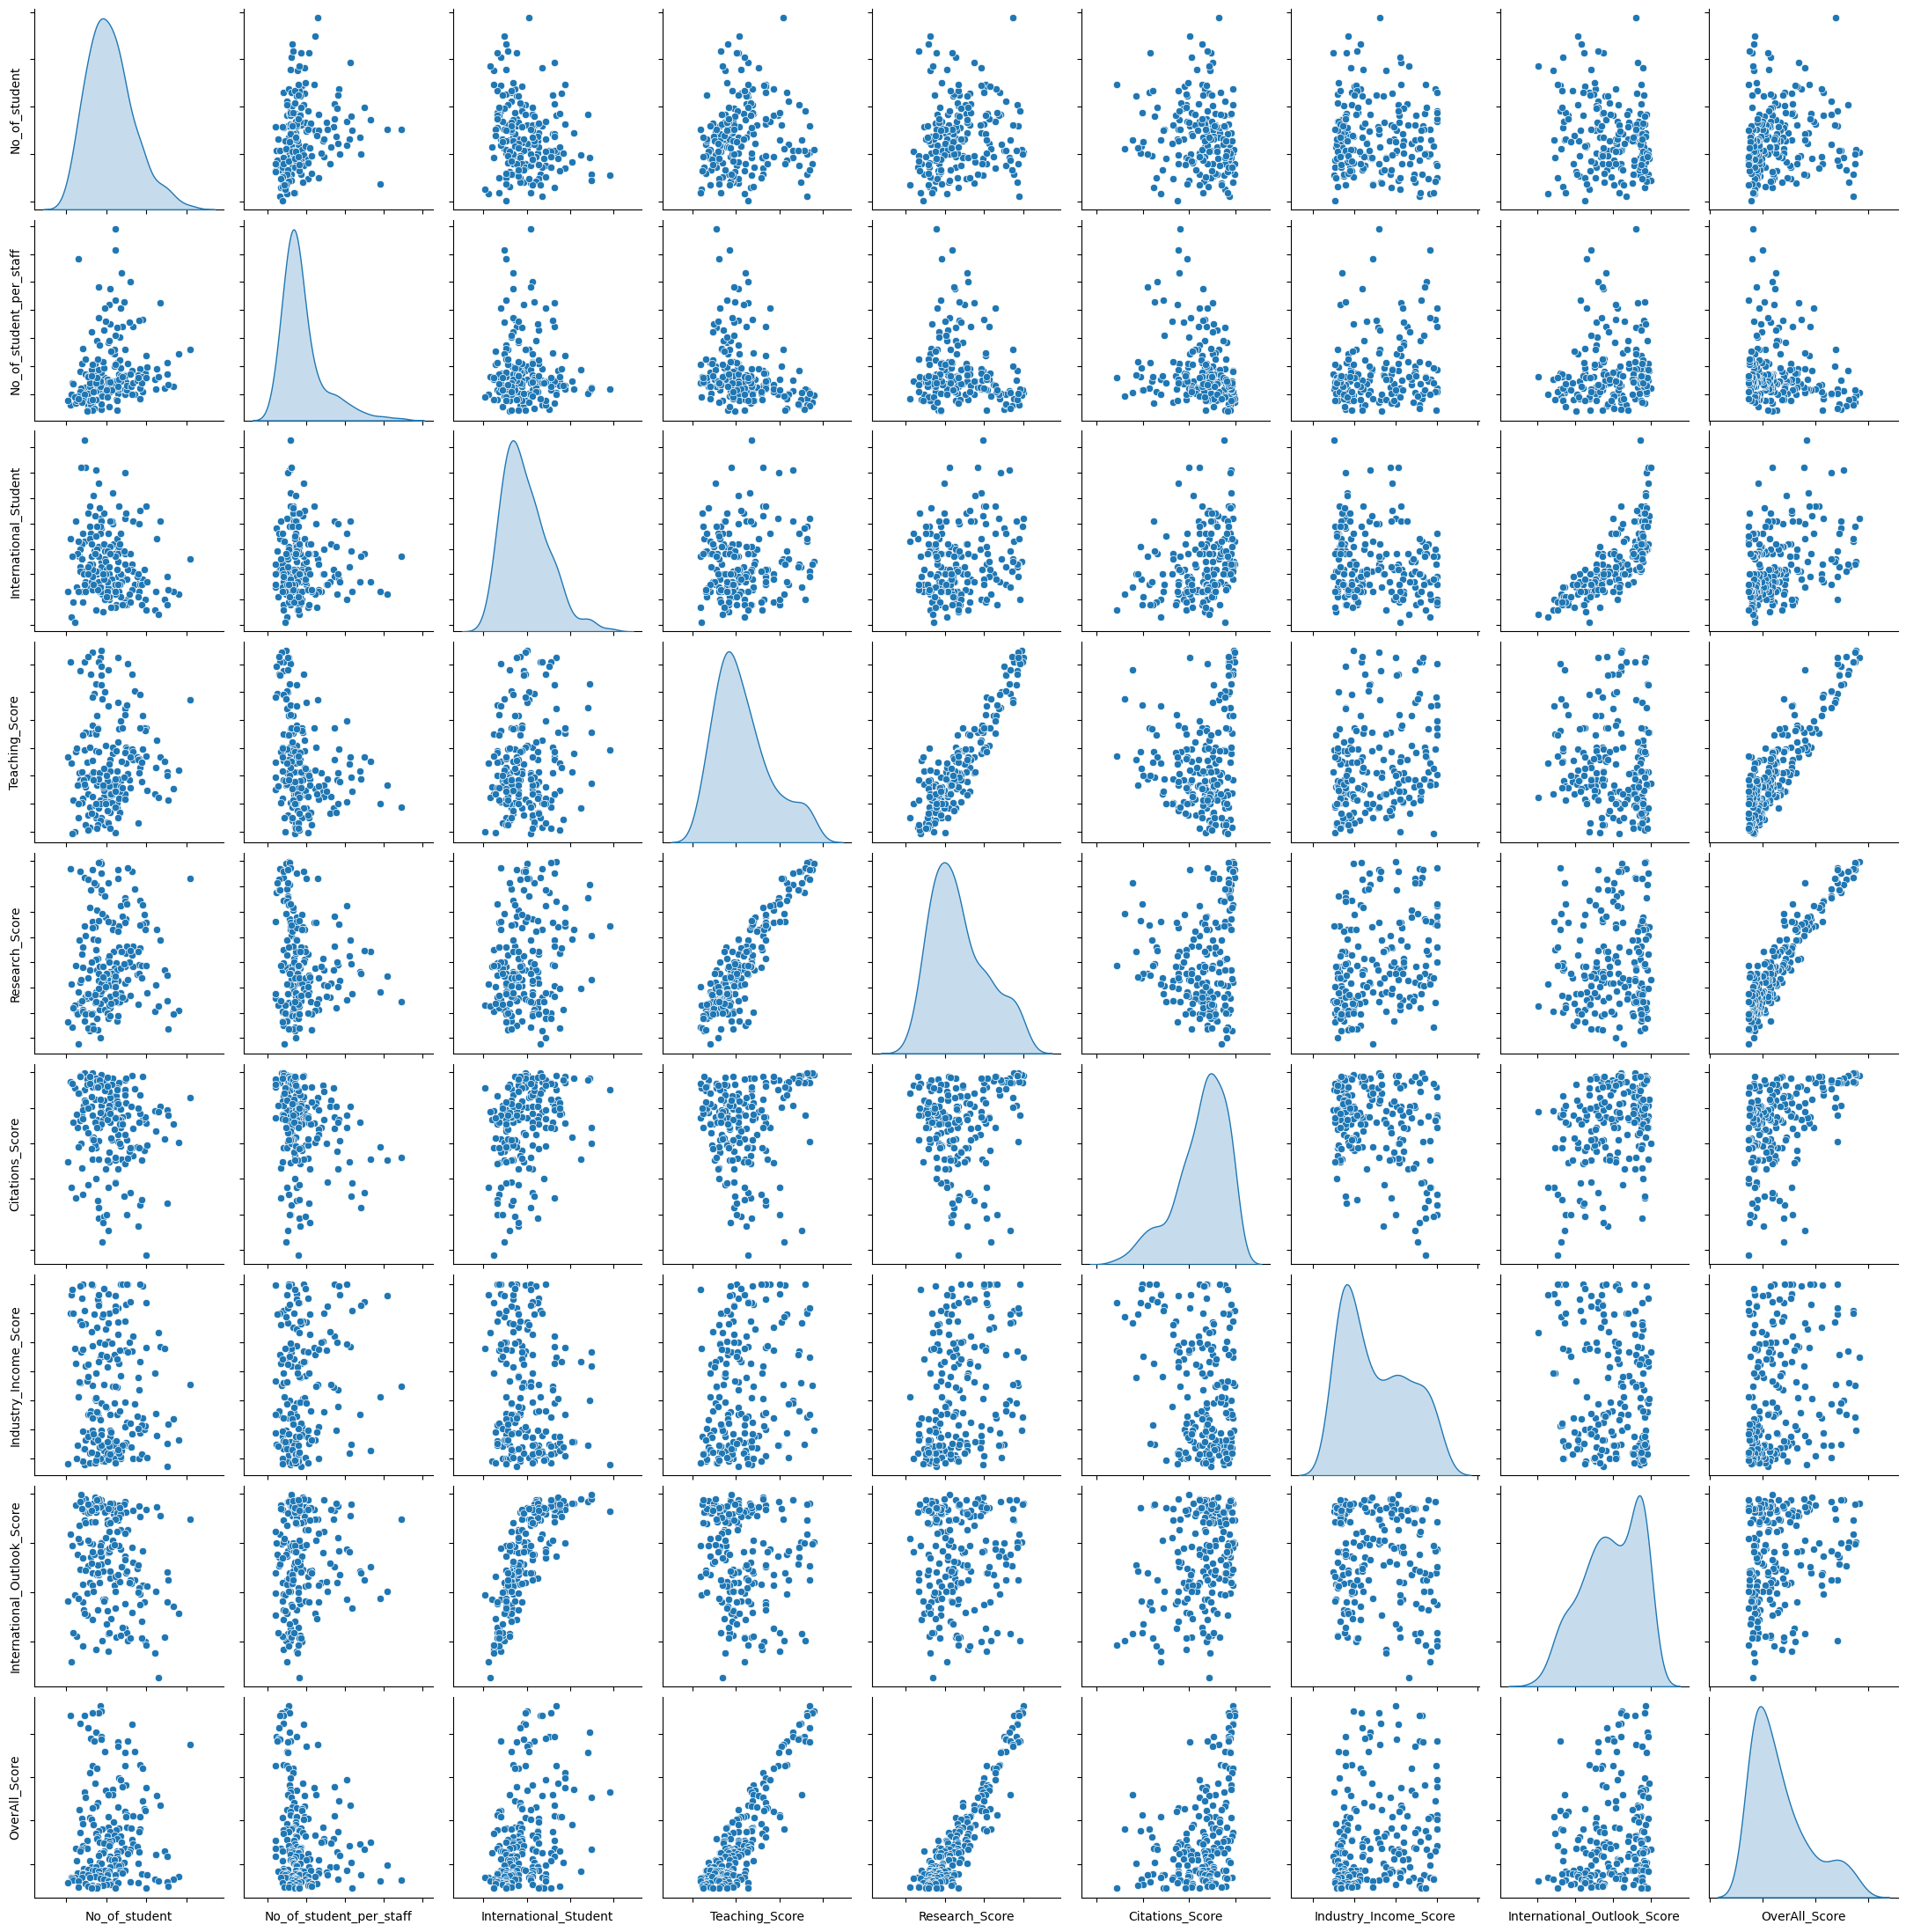

In [15]:
plt = sns.pairplot(df, diag_kind ="kde")
plt.set(xticklabels=[], yticklabels=[])
plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')
plt

In [16]:
modelFormula = 'OverAll_Score ~ '

modelFormula += ' + '.join(allOtherFeatures)
print(modelFormula)
    
# your code here
model = smf.ols(formula=modelFormula , data=df).fit()
print(model.summary())

OverAll_Score ~ No_of_student + No_of_student_per_staff + International_Student + Teaching_Score + Research_Score + Citations_Score + Industry_Income_Score + International_Outlook_Score
                            OLS Regression Results                            
Dep. Variable:          OverAll_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.857e+06
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:01:54   Log-Likelihood:                 404.69
No. Observations:                 199   AIC:                            -791.4
Df Residuals:                     190   BIC:                            -761.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        

so we remove 'No_of_student', 'No_of_student_per_staff', 'International_Student'

In [17]:
modelFormula = 'OverAll_Score ~ '

allOtherFeatures = df.columns.values.tolist()
allOtherFeatures.remove('OverAll_Score')
allOtherFeatures.remove('No_of_student')
allOtherFeatures.remove('No_of_student_per_staff')
allOtherFeatures.remove('International_Student')

modelFormula += ' + '.join(allOtherFeatures)
print(modelFormula)
    
# your code here
model = smf.ols(formula=modelFormula , data=df).fit()
print(model.summary())

OverAll_Score ~ Teaching_Score + Research_Score + Citations_Score + Industry_Income_Score + International_Outlook_Score
                            OLS Regression Results                            
Dep. Variable:          OverAll_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.572e+06
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:54   Log-Likelihood:                 403.14
No. Observations:                 199   AIC:                            -794.3
Df Residuals:                     193   BIC:                            -774.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0